# Advanced Methods in Data Analysis

# Ejercicio 9 - Grupo 8



## Integrantes
Laura Gutierrez   Código 201015209

Fernando Bautista Código 202027865

Fredi Baron       Código 202027522

Ingrid Hernández  Código 202028041


### Car Price Prediction
Predict if the price of a car is low or high

In [1]:
%matplotlib inline
import pandas as pd

data = pd.read_csv('dataTrain_carListings.csv')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
data = data.drop(['Model', 'Price'], axis=1)

data.head()

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
15,2016,29242,0,0,0,0,1,0,0,1
47,2015,26465,0,0,0,0,1,0,0,1
85,2012,46739,0,1,0,0,0,0,0,1
141,2017,41722,0,0,0,0,0,1,0,1
226,2014,77669,0,0,0,0,0,0,1,0


In [2]:
data.describe()

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
count,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000
mean,2013.560304,52345.992776,0.056426,0.157338,0.012548,0.049430,0.234373,0.378403,0.111483,0.579544
std,3.109673,36583.768481,0.230751,0.364133,0.111315,0.216772,0.423622,0.485007,0.314741,0.493651
min,1998.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,26375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,41658.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,70763.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2018.000000,232658.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X.columns

Index(['Year', 'Mileage', 'M_Camry', 'M_Camry4dr', 'M_CamryBase', 'M_CamryL',
       'M_CamryLE', 'M_CamrySE', 'M_CamryXLE'],
      dtype='object')

### Exercise 8.1
Estimate a Decision Tree Classifier Manually using the code created in the decision trees notebook.

Evaluate the accuracy on the testing set

In [6]:
max_depth = None # numero de pisos/niveles del arbol
num_pct = 10
max_features = None #variables explicativas
min_gain=0.001

In [7]:
j = 1
print(X_train.columns[j])

Mileage


In [8]:
import pandas as pd
import numpy as np
splits = np.percentile(X_train.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())

In [9]:
splits

array([6.000000e+00, 1.603480e+04, 2.324080e+04, 2.987540e+04,
       3.565100e+04, 4.160950e+04, 4.849280e+04, 6.199830e+04,
       8.097420e+04, 1.061537e+05])

In [10]:
k = 5

In [11]:
filter_l = X_train.iloc[:, j] < splits[k]

y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]

In [12]:
def gini(y_train):
    if y_train.shape[0] == 0:
        return 0
    else:
        return 1 - (y_train.mean()**2 + (1 - y_train.mean())**2)

In [13]:
def gini_impurity(X_col, y_train, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y_train.loc[filter_l]
    y_r = y_train.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y_train)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [14]:
gini_impurity(X_train.iloc[:, j], y_train, splits[k])

0.18743041714283493

In [15]:
def best_split(X_train, y_train, num_pct=10):
    
    features = range(X_train.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X_train.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X_train.iloc[:, j], y_train, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [16]:
j, split, gain = best_split(X_train, y_train, 5)
j, split, gain 

(1, 56598.66666666667, 0.23507164147905313)

Iniciar el árbol en la variable 1 que es el millaje, en el threshold "56598.66666666667" genera la mayor ganacia de gini es 0.23507164147905313.

In [17]:
filter_l = X_train.iloc[:, j] < split

y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]

In [18]:
y_train.shape[0], y_l.shape[0], y_r.shape[0]

(8810, 5873, 2937)

In [19]:
y_train.mean(), y_l.mean(), y_r.mean()

(0.5780930760499432, 0.8205346500936489, 0.09329247531494722)

El 57% de los carros tiene precio alto, el 82% de los que el millaje es menor que 56598.6 tienen precios altos y el 81% de los que tienen el millaje mayor a ese valor tienen precios altos, es decir que se el modelo está haciendo un muy buen split.

In [20]:
def tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X_train.shape[0] == 1:
        tree = dict(y_pred=y_train.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X_train, y_train, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y_train.mean() >= 0.5) 
    y_prob = (y_train.sum() + 1.0) / (y_train.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X_train.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X_train.iloc[:, j] < split
    X_l, y_l = X_train.loc[filter_l], y_train.loc[filter_l]
    X_r, y_r = X_train.loc[~filter_l], y_train.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [21]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)

In [22]:
tree

{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 8810,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': [0, 2014.0],
  'n_samples': 5606,
  'gain': 0.03317687167496233,
  'sl': {'y_pred': 0,
   'y_prob': 0.36828644501278773,
   'level': 2,
   'split': [0, 2012.0],
   'n_samples': 389,
   'gain': 0.05908490521197157,
   'sl': {'y_pred': 0,
    'y_prob': 0.08,
    'level': 3,
    'split': -1,
    'n_samples': 98,
    'gain': 0.01707452211653898},
   'sr': {'y_pred': 0,
    'y_prob': 0.46757679180887374,
    'level': 3,
    'split': -1,
    'n_samples': 291,
    'gain': 0.036947257392555666}},
  'sr': {'y_pred': 1,
   'y_prob': 0.8743054224947308,
   'level': 2,
   'split': [0, 2015.0],
   'n_samples': 5217,
   'gain': 0.014933378976312917,
   'sl': {'y_pred': 1,
    'y_prob': 0.7348484848484849,
    'level': 3,
    'split': -1,
    'n_samples': 1450,
    'gain': 0.024495220

In [23]:
def tree_predict(X_train, tree, proba=False):
    
    predicted = np.ones(X_train.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X_train.iloc[:, j] < split)
        X_l = X_train.loc[filter_l]
        X_r = X_train.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [24]:
y_pred = tree_predict(X_test, tree)
y_pred

array([0., 1., 1., ..., 1., 1., 0.])

In [25]:
from sklearn import metrics
print("Accuracy;",metrics.accuracy_score(y_pred, y_test))

Accuracy; 0.8610599078341014


## Exercise 8.2
Estimate a Bagging of 10 Decision Tree Classifiers Manually using the code created in bagging notebook.

Evaluate the accuracy on the testing set

In [26]:
train = pd.concat([y_train, X_train], axis=1, join="inner")
train
test = pd.concat([y_test, X_test], axis=1, join="inner")
test

,HighPrice,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
332784,1,2012,37294,0,1,0,0,0,0,0
146436,1,2015,45405,0,0,0,0,0,1,0
130476,1,2016,30648,0,0,0,0,0,1,0
85618,1,2015,27313,0,0,0,0,0,1,0
75474,0,2009,123815,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
244795,1,2017,6268,0,0,0,0,0,1,0
366403,0,2013,118533,0,0,0,0,0,0,1
269482,1,2016,43768,0,0,0,0,0,1,0
5010,1,2016,22978,0,0,0,0,0,1,0


In [27]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = train.shape[0]
n_B = 10
# n_samples
# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([3582, 1346, 5218, ..., 5288, 5094, 8043]),
 array([ 431, 3426, 8463, ..., 8218,  237, 8326]),
 array([8477, 4773, 5743, ..., 1809,  214, 6910]),
 array([5885, 1492, 7249, ..., 1834,  137, 7586]),
 array([ 352, 4574, 5708, ..., 7142, 2081, 7438]),
 array([2311, 6342, 4124, ..., 8286, 8453, 1222]),
 array([5003, 7878, 7832, ..., 3522,  407, 3676]),
 array([6901, 1829, 1437, ..., 8100, 3585,  522]),
 array([2874, 2197, 2888, ...,  477, 5922, 4068]),
 array([5547, 7784, 7473, ..., 4908, 6648, 3622])]

In [28]:
# show the rows for the first decision tree
train.iloc[samples[0], :]

,HighPrice,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
358005,1,2013,82246,1,0,0,0,0,0,0
137970,1,2016,38701,0,0,0,0,1,0,0
272337,1,2017,14302,0,0,0,0,0,1,0
354913,1,2017,35268,0,0,0,0,0,1,0
138402,1,2014,6455,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
110261,1,2014,22327,0,0,0,1,0,0,0
240532,0,2013,87215,0,0,0,0,0,0,1
305076,1,2015,24100,0,0,0,0,1,0,0
122421,0,2016,49095,0,0,0,0,0,1,0


In [29]:
from sklearn.tree import DecisionTreeClassifier

# grow each tree deep
treeclf = DecisionTreeClassifier(max_depth=None, random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treeclf.fit(X_train, y_train)
    y_pred[i] = treeclf.predict(X_test)

In [30]:
y_pred

,0,1,2,3,4,5,6,7,8,9
332784,0,0,0,0,1,1,0,1,1,1
146436,1,1,1,1,1,1,1,1,1,1
130476,1,1,1,1,1,1,1,1,1,1
85618,1,1,1,1,1,1,1,1,1,1
75474,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
244795,1,1,1,1,1,1,1,1,1,1
366403,1,0,0,0,0,0,0,0,0,0
269482,1,1,1,1,1,1,1,1,1,1
5010,1,1,1,1,1,1,1,1,1,1


In [31]:
for i in range(n_B):
    print(i, metrics.accuracy_score(y_pred[i], y_test))

0 0.8338709677419355
1 0.8334101382488479
2 0.8304147465437788
3 0.8246543778801844
4 0.8235023041474654
5 0.8352534562211982
6 0.8357142857142857
7 0.8315668202764976
8 0.8368663594470046
9 0.8329493087557603


In [32]:
y_pred = y_pred.mean(axis=1)

In [33]:
y_pred

332784    0.5
146436    1.0
130476    1.0
85618     1.0
75474     0.0
         ... 
244795    1.0
366403    0.1
269482    1.0
5010      1.0
310628    0.0
Length: 4340, dtype: float64

In [34]:
y_pred = (y_pred > 0.5).astype(int)

In [35]:
y_pred

332784    0
146436    1
130476    1
85618     1
75474     0
         ..
244795    1
366403    0
269482    1
5010      1
310628    0
Length: 4340, dtype: int32

In [36]:
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.8456221198156681


## Exercise 8.3

Compare the impact in the results by varing the parameter max_features

Evaluate the accuracy on the testing set

In [37]:
from sklearn.ensemble import BaggingClassifier
accuracy_scores = []
max_features = [1,2,3,4,5,6,7,8,9]

for i in max_features:
    bagtrees = BaggingClassifier(base_estimator = DecisionTreeClassifier(), 
                                     n_estimators = 10, random_state = 1, max_features = i )
    bagtrees.fit(X_train, y_train)
    y_pred = bagtrees.predict(X_test)
    metrics.accuracy_score(y_test, y_pred)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))

In [38]:
accuracy_scores

[0.7850230414746544,
 0.8320276497695852,
 0.85,
 0.8447004608294931,
 0.8571428571428571,
 0.8523041474654378,
 0.8525345622119815,
 0.8453917050691244,
 0.8451612903225807]

Text(0, 0.5, 'Accuracy')

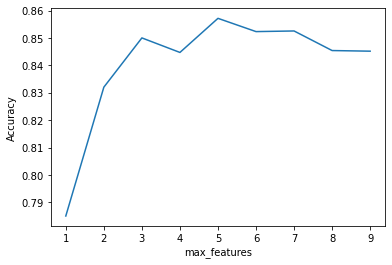

In [39]:
import matplotlib.pyplot as plt

plt.plot(max_features, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy') 

Al implementar el modelo clasificador Bagging se puede observar que el óptimo del hiperparámetro max features se encuentra alrededor de 5 features

## Exercise 8.4
Estimate a Bagging of 10 Decision Tree Classifiers with max_features = log(n_features)

Evaluate the accuracy on the testing set

In [40]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
n_features = 9
max_feature = np.log(n_features).astype(int)
max_feature
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, max_features = max_feature, random_state=0)

In [41]:
# # fit and predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.5824884792626728


## Exercise 8.5
Using sklearn, train a RandomForestClassifier

Evaluate the accuracy on the testing set

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [44]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8361751152073733


## Exercise 8.6
Find the best parameters of the RandomForestClassifier (max_depth, max_features, n_estimators)

Evaluate the accuracy on the testing set

In [46]:
## tuning n_estimators (# arboles)
# total features = 9
# list of values to try for n_estimators
estimator_range = range(100, 500, 20) 

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, max_depth=3, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())  ########## COMO ESCOGER CV= 5

Text(0, 0.5, 'Accuracy')

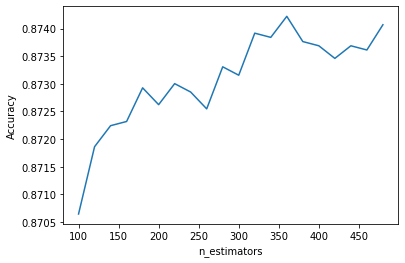

In [47]:
import matplotlib.pyplot as plt

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy') 

El número de estimadores (árboles) óptimo se encuentra al rededor de 350-380 y max depth = 3, parámetros que se usarán para el identificar el max_features óptimo

In [48]:
### Tuning max_features
# list of values to try for max_features
feature_cols = 9
feature_range = range(1, feature_cols+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=360, max_depth = 3, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

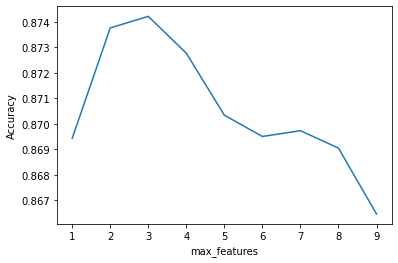

In [49]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

De acuerdo a la gráfica de accuracy vs max_features el número óptimo de variables que se debería usar es 3. A continuación se estima el modelo usando los parámetros encontrados en el ejercicio anterior

In [50]:
clf = RandomForestClassifier(n_estimators=360, max_depth = 3, max_features=3, random_state=1, n_jobs=-1)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [51]:
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #0.8737327188940092

Accuracy: 0.8737327188940092


## Exercise 8.7
Using xgboost train a XGBClassifier

Evaluate the accuracy on the testing set

In [52]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [53]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred, y_test.values))

[22:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Laura.Gutiierrez\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.8730414746543779


## Exercise 8.8
Using xgboost train a XGBClassifier

Modify the parameters learning rate, gamma, colsample_bytree. Explain what each parameter means.

Evaluate the accuracy on the testing set

In [54]:
import time
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy
from sklearn.metrics import accuracy_score
start_time=time.time()
# grid search
model = XGBClassifier(eval_metric='mlogloss'
                     , use_label_encoder =False)
param_grid = {
        'gamma': np.arange(0.0,40.0,0.005),
        'learning_rate': np.arange(0.0005,0.3,0.0005),
        'colsample_bytree': np.arange(0.1,1.0,0.01)    
}

kfold = KFold(n_splits=2, random_state=None, shuffle=False)
    
grid_search = RandomizedSearchCV(model, param_grid, scoring="accuracy", n_iter = 500, cv=kfold)
grid_result = grid_search.fit(X,y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

print(time.time()-start_time) ## SLOW!!! 8 min aprox

Best: 0.883726 using {'learning_rate': 0.216, 'gamma': 4.7250000000000005, 'colsample_bytree': 0.8299999999999996}
613.3611311912537


A continuación, entrenamos el modelo XGBClassifier con los parámetros que mejor performace tuvieron. 

Learning rate: 0.216

Gamma: 4.7250000000000005

colsample_bytree: 0.8299999999999996

In [55]:
clf = XGBClassifier(learning_rate=0.057,gamma=3.5700000000000003,colsample_bytree=0.6199999999999998,use_label_encoder =False)

In [56]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred, y_test.values))

[22:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8792626728110599


### Significado hiperparámetros de XGBoost
Learning rate: rapidez con que el modelo itera o se mueve de una observación a la siguiente

Gamma: especifica la reducción de pérdida mínima necesaria para realizar una división

colsample_bytree: porcentage de columnas o variables explicativas (features) que serán usadas para construir cada arbol

### Conclusiones
Después de implementar los diferentes modelos para predecir si el precio de un carro con base en ciertas características es alto o bajo, podemos identificar que el modelo con mejor performance tomando Accuracy como métrica de desempeño fue el XGBoost con Learning rate: 0.216, Gamma: 4.7250000000000005 y colsample_bytree: 0.8299999999999996 con un accuracy de 0.8792626728110599

Link Github: 